In [2]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
#warnings.filterwarnings("ignore")

## 3.4.1 Principal Component Analysis (PCA)

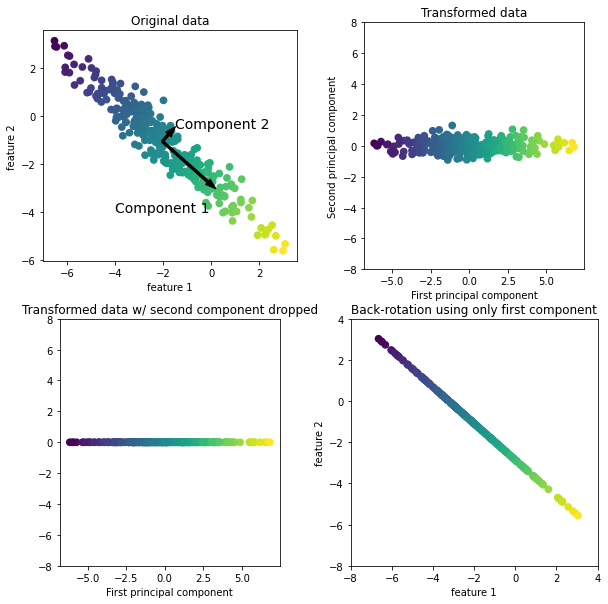

In [2]:
mglearn.plots.plot_pca_illustration()

### visualization using PCA with cancer data
- PCA is usually used in visualization of high-dimension dataset
- let's look at each feature's histogram for two classes 'malignant' and 'benign'

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

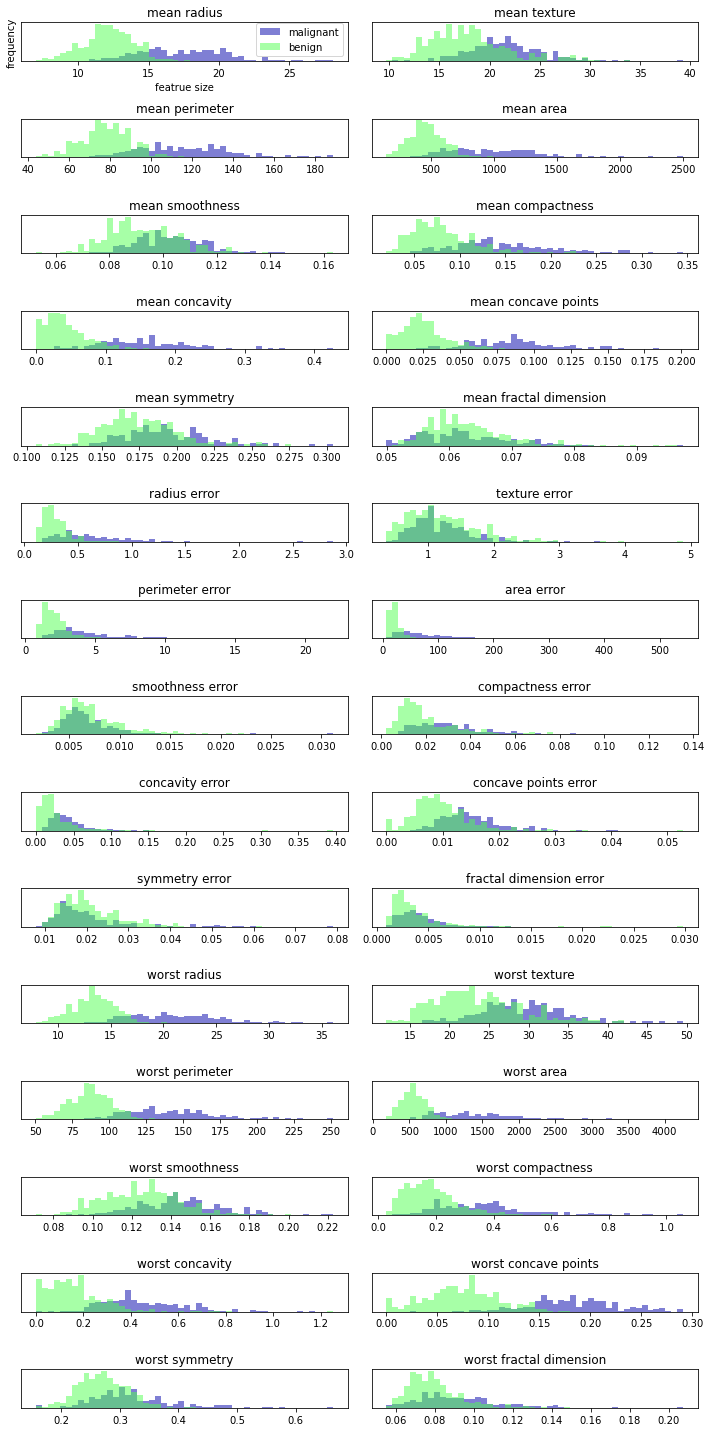

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("featrue size")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

with these PCA histograms, we can find principal interaction, but cannot tell the interactions among features or which relations exist with the interactions

In [5]:
# scaling with StandardScaler (average=0, distribution=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
# keeping the first 2 components in the data
pca = PCA(n_components=2)
#making PCA model with cancer data
pca.fit(X_scaled)

#transforming the data using the first 2 components
X_pca = pca.transform(X_scaled)
print("original data shape:", str(X_scaled.shape))
print("reduced data shape:", str(X_pca.shape))

original data shape: (569, 30)
reduced data shape: (569, 2)


Text(0, 0.5, 'second principal component')

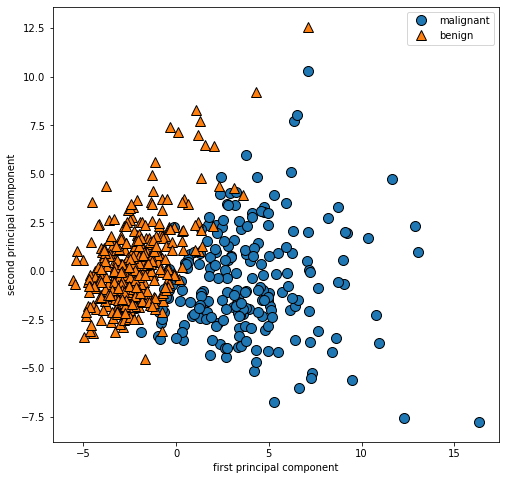

In [7]:
# showing the 2 components differentiated in colors on the graph
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [8]:
print("shape of principal components", pca.components_.shape)

shape of principal components (2, 30)


In [9]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'Principal Component')

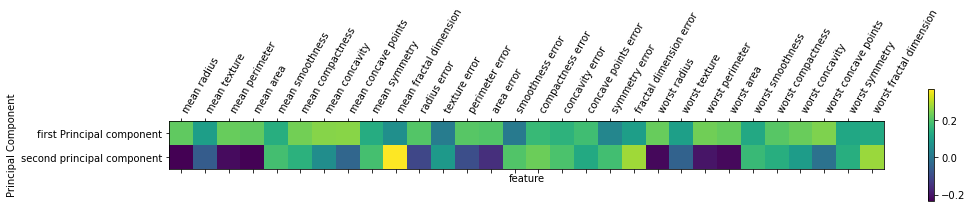

In [10]:
# visualization the principal componets with hitmap
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first Principal component", "second principal component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("Principal Component")

## eigenface feature extraction

In [11]:
from tqdm import tqdm

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
'''
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in tqdm(zip(people.target, people.images, axes.ravel())):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
'''

"\nfig, axes = plt.subplots(2, 5, figsize=(15, 8),\n                        subplot_kw={'xticks': (), 'yticks': ()})\nfor target, image, ax in tqdm(zip(people.target, people.images, axes.ravel())):\n    ax.imshow(image)\n    ax.set_title(people.target_names[target])\n"

10it [00:00, 794.60it/s]


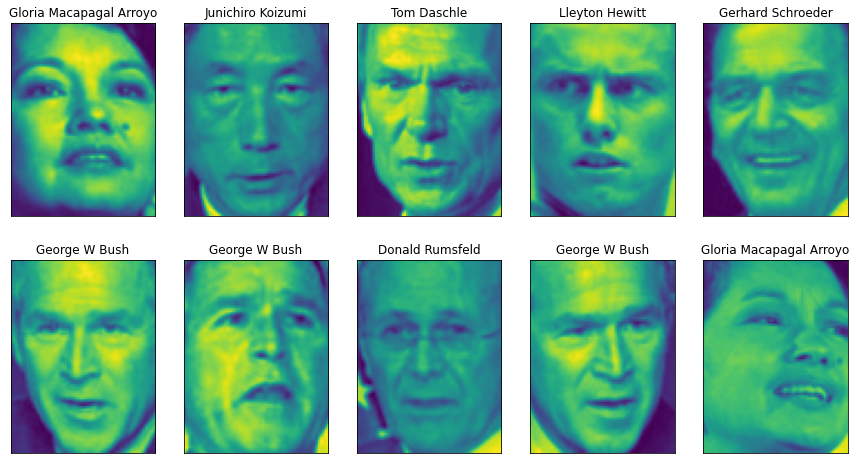

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in tqdm(zip(people.target, people.images, axes.ravel())):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [14]:
print("people.images.shape:",people.images.shape)
print("the number of classes:", len(people.target_names))

people.images.shape: (1091, 87, 65)
the number of classes: 13


In [15]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           33   Atal Bihari Vajpayee       24   Bill Clinton               29   
Donald Rumsfeld           121   George W Bush             530   Gerhard Schroeder         109   
Gloria Macapagal Arroyo    44   Igor Ivanov                20   Junichiro Koizumi          60   
Kofi Annan                 32   Lleyton Hewitt             41   Tiger Woods                23   
Tom Daschle                25   

In [16]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-NN test set score", knn.score(X_test, y_test))

1-NN test set score 0.4915254237288136


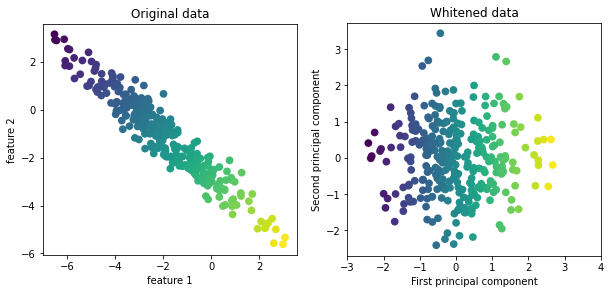

In [18]:
mglearn.plots.plot_pca_whitening()

In [19]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (353, 100)


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("test set accuracy:", knn.score(X_test_pca, y_test))

test set accuracy: 0.4830508474576271


In [21]:
print("pca.components_.shape", pca.components_.shape)

pca.components_.shape (100, 5655)


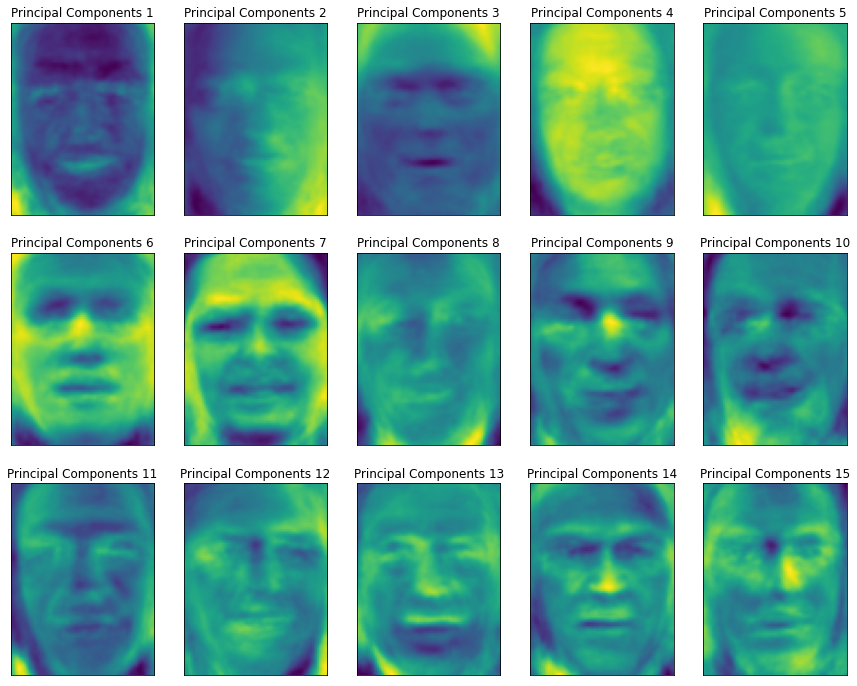

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f"Principal Components {i+1}")

## 3.4.2 Non-negative Matrix Factorization(NMF)

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


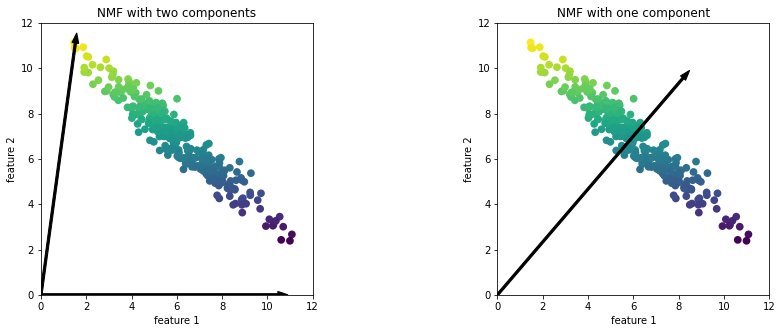

In [23]:
mglearn.plots.plot_nmf_illustration()

In [24]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.338562, ..., 0.197386],
       ...,
       [0.103268, ..., 0.210458]], dtype=float32), 
array([[0.373856, ..., 0.201307],
       ...,
       [0.155556, ..., 0.109804]], dtype=float32))


/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


KeyboardInterrupt: 

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


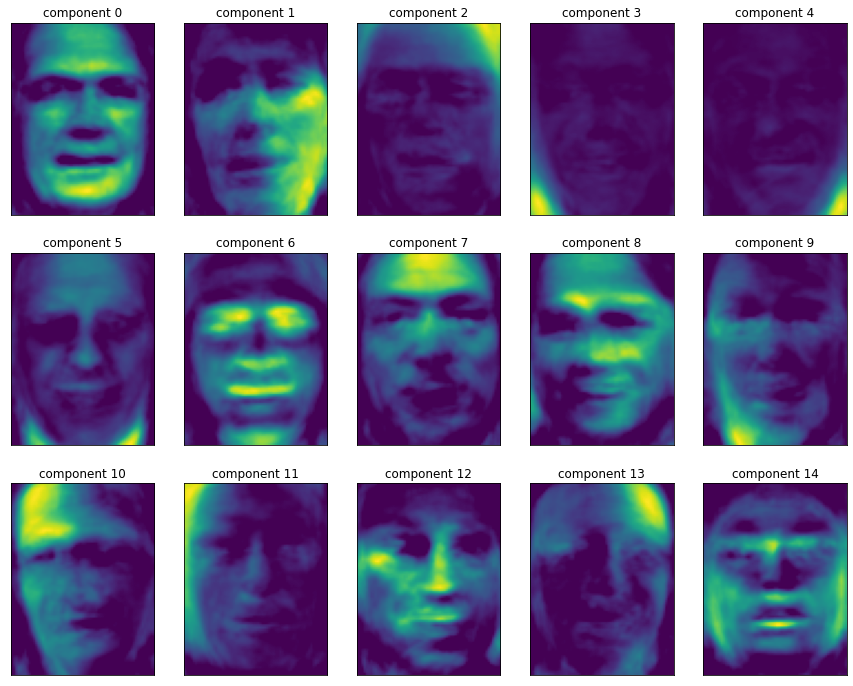

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"component {i}")
    

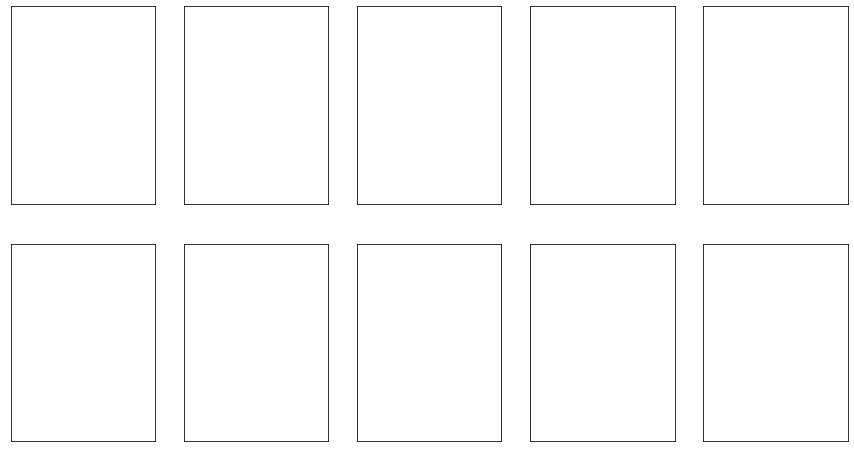

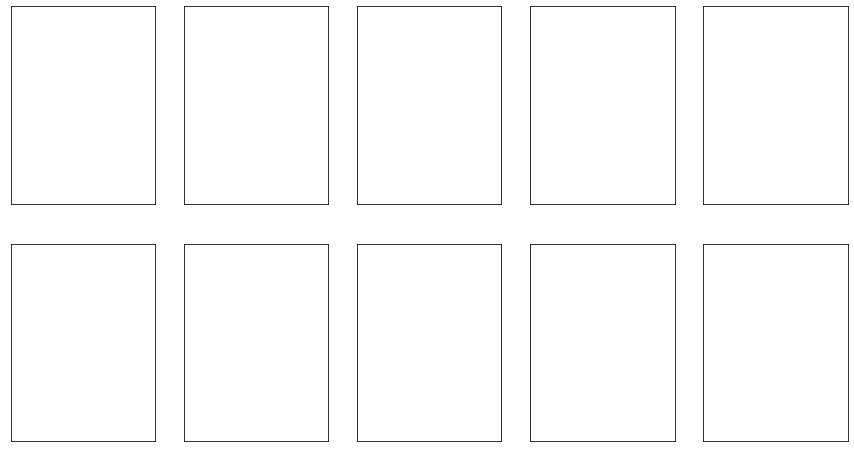

In [27]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, size = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, size = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

## 3.4.3 Manifold learning with t-SNE

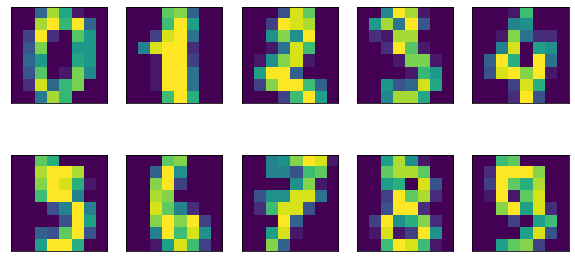

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2,5, figsize=(10, 5),
                        subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'The sencond principal component')

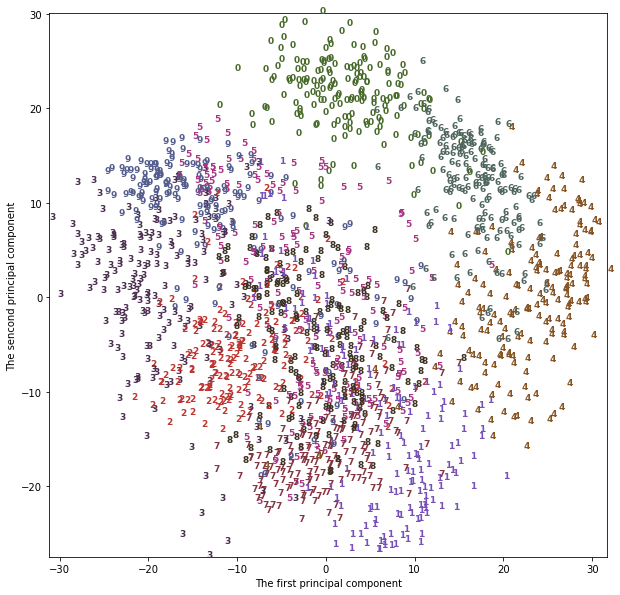

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={"weight": "bold", "size": 9})
plt.xlabel("The first principal component")
plt.ylabel("The sencond principal component")

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# using fit_transform instead of transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

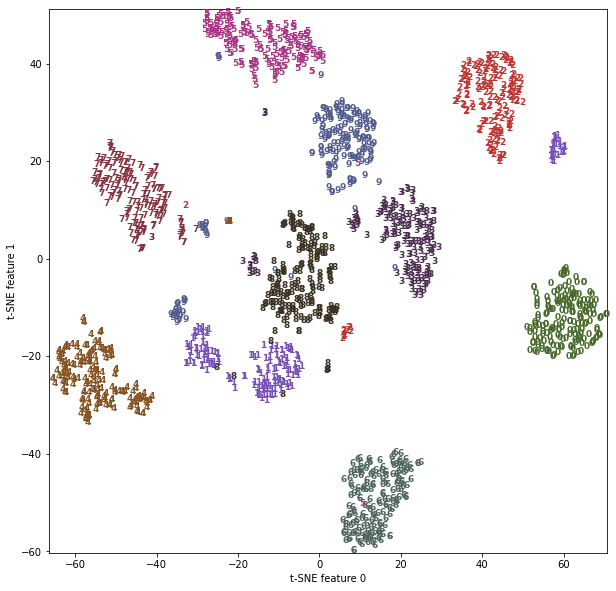

In [6]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={"weight": "bold", "size": 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")